# Chapter 2: Multi-armed Bandit

## Exercise 2.1

In $\epsilon$-greedy action selection, for the case of two actions and $\epsilon=0.5$, what is the probability that the greedy action is selected?

**Answer**: 50% of the time the greedy action is exploited. There's a 50% chance of exploration, in which the greedy or non-greedy actions are selected each with 50% probability, so the probability of selecting the greedy action in total is:


$$
P(A_g) = P(A_g | exploration) + P(A_g | exploitation) = 0.5 \times 0.5 + 0.5 \times 1 = 0.75
$$

## Exercise 2.2

Bandit example Consider a k-armed bandit problem with k = 4 actions, denoted 1, 2, 3, and 4. Consider applying to this problem a bandit algorithm using ε-greedy action selection, sample-average action-value estimates, and initial estimates of $Q_1(a) = 0$, for all a. Suppose the initial sequence of actions and rewards is $A_1 = 1$, $R_1 = 1$, $A_2 = 2$, $R_2$ = 1, $A_3$ = 2, $R_3 = 2$, $A_4 = 2$, $R_4 = 2$, $A_5 = 3$, $R_5 = 0$. On some of these time steps the ε case may have occurred, causing an action to be selected at random. On which time steps did this definitely occur? On which time steps could this possibly have occurred

**Answer**: **INCOMPLETE**
1) The first action could have been selected randomly.
2) The second action is selected randomly with probability $\epsilon = 0.1$.
3) The third action could have been selected randomly.
4) The fourth action could have been selected randomly.
5) The fifth action is selected randomly with probability $\epsilon = 0.1$.

## Exercise 2.3

In the comparison shown in Figure 2.2, which method will perform best in the long run in terms of cumulative reward and cumulative probability of selecting the best action? How much better will it be? Express your answer quantitatively.

**Answer**: The $\epsilon = 0.01$ method will choose the best action 0.99 of the time, while the $\epsilon = 0.1$ method will choose it 0.90 of the time, leading to a 9% higher probability of selecting the best action for the $\epsilon = 0.01$ case. The $\epsilon = 0.01$ method will also have a higher cumulative reward, since it will choose the best action more often.

## Exercise 2.4

If the step-size parameters, α_n, are not constant, then the estimate Q_n is a weighted average of previously received rewards with a weighting different from that given by (2.6). What is the weighting on each prior reward for the general case, analogous to (2.6), in terms of the sequence of step-size parameters?

**Answer**:

$$Q_{n+1} = \alpha_n R_n + (1 - \alpha_n) \alpha_{n-1} R_{n-1} + \cdots + (1 - \alpha_n) (1 - \alpha_{n-1}) \cdots (1 - \alpha_1) \alpha_0 R_0 + (1 - \alpha_n) (1 - \alpha_{n-1}) \cdots (1 - \alpha_0) Q_0 \\

\text{weight}(R_i) = \alpha_i (1 - \alpha_{i+1}) \cdots (1 - \alpha_n) \\

Q_{n+1} = Q_1 \prod_{i=1}^{n} (1 - \alpha_i) + \sum_{i=1}^{n} \left[ \alpha_i R_i \prod_{j=i+1}^{n} (1 - \alpha_j) \right]$$


## Exercise 2.5 (programming)

Design and conduct an experiment to demonstrate the difficulties that sample-average methods have for nonstationary problems. Use a modified version of the 10-armed testbed in which all the $q_*(a)$ start out equal and then take independent random walks (say by adding a normally distributed increment with mean 0 and standard deviation 0.01 to all the $q_*(a)$ on each step). Prepare plots like Figure 2.2 for an action-value method using sample averages, incrementally computed, and another action-value method using a constant step-size parameter, α = 0.1. Use ε = 0.1 and longer runs, say of 10,000 steps.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def run_experiment(num_bandits: int, time_steps: int, epsilon: float, alpha: float, stationary: bool):
    """
    Runs a single experiment for the multi-armed bandit problem.

    Args:
        num_bandits: number of bandits
        time_steps: number of time steps
        epsilon: epsilon for epsilon-greedy action selection
        alpha: alpha for constant step-size method
        stationary: whether the bandits are stationary

    Returns:
        q_star: true action values
        q_estimates_samp_avg: sample-average action values
        q_estimates_alpha: constant step-size action values
        actions_samp_avg: actions taken by sample-average method
        actions_alpha: actions taken by constant step-size method
        rewards_samp_avg: rewards received by sample-average method
        rewards_alpha: rewards received by constant step-size method
        action_counts_samp_avg: number of times each action was taken by sample-average method
        action_counts_alpha: number of times each action was taken by constant step-size method
    """
    # Initialize qs
    q_star = np.zeros(num_bandits)
    q_estimates_samp_avg = np.zeros(num_bandits)
    q_estimates_alpha = np.zeros(num_bandits)

    # Initialize action and reward arrays
    actions_samp_avg = np.zeros(time_steps)
    actions_alpha = np.zeros(time_steps)
    rewards_samp_avg = np.zeros(time_steps)
    rewards_alpha = np.zeros(time_steps)
    action_counts_samp_avg = np.zeros(num_bandits)
    action_counts_alpha = np.zeros(num_bandits)

    # Run experiment
    for t in range(time_steps):
        # Sample-average method
        if np.random.rand() < epsilon:
            action_samp_avg = np.random.choice(num_bandits)
        else:
            action_samp_avg = np.argmax(q_estimates_samp_avg)

        # Constant step-size method
        if np.random.rand() < epsilon:
            action_alpha = np.random.choice(num_bandits)
        else:
            action_alpha = np.argmax(q_estimates_alpha)

        reward_samp_avg = np.random.normal(q_star[action_samp_avg], 1)
        reward_alpha = np.random.normal(q_star[action_alpha], 1)

        # Update action counts
        action_counts_samp_avg[action_samp_avg] += 1
        action_counts_alpha[action_alpha] += 1

        # Update rewards
        rewards_samp_avg[t] = reward_samp_avg
        rewards_alpha[t] = reward_alpha

        # Update action value estimates
        q_estimates_samp_avg[action_samp_avg] += (reward_samp_avg - q_estimates_samp_avg[action_samp_avg]) / action_counts_samp_avg[action_samp_avg]
        q_estimates_alpha[action_alpha] += alpha * (reward_alpha - q_estimates_alpha[action_alpha])

        # Update true action values for non-stationary case
        if not stationary:
            q_star += np.random.normal(0, 0.01, num_bandits)

    return rewards_samp_avg, rewards_alpha

def run_experiments(num_experiments, num_bandits, time_steps, epsilon, alpha, stationary=True):
    rewards_samp_avg = np.zeros(time_steps)
    rewards_alpha = np.zeros(time_steps)

    for i in range(num_experiments):
        r_samp_avg, r_alpha = run_experiment(num_bandits, time_steps, epsilon, alpha, stationary)
        rewards_samp_avg += r_samp_avg
        rewards_alpha += r_alpha

    rewards_samp_avg /= num_experiments
    rewards_alpha /= num_experiments

    return rewards_samp_avg, rewards_alpha

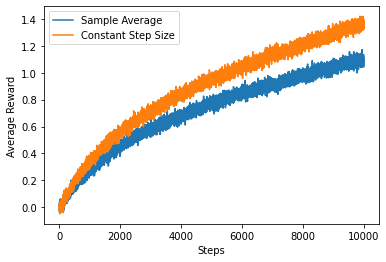

In [3]:
num_experiments = 2000
num_bandits = 10
time_steps = 10000
epsilon = 0.1
alpha = 0.1
stationary = False

rewards_samp_avg, rewards_alpha = run_experiments(num_experiments, num_bandits, time_steps, epsilon, alpha, stationary)

plt.plot(rewards_samp_avg, label='Sample Average')
plt.plot(rewards_alpha, label='Constant Step Size')
plt.xlabel('Steps')
plt.ylabel('Average Reward')
plt.legend()
plt.show()


## Exercise 2.6

The results shown in Figure 2.3 should be quite reliable because they are averages over 2000 individual, randomly chosen 10-armed bandit tasks. Why, then, are there oscillations and spikes in the early parts of the curves for optimistic method? In other words, what might make this method perform particularly better or worse, on average, on particular early steps?

**Answer:**

## Exercise 2.7

